## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('shot_logs.csv')
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       128069 non-null int64
MATCHUP                       128069 non-null object
LOCATION                      128069 non-null object
W                             128069 non-null object
FINAL_MARGIN                  128069 non-null int64
SHOT_NUMBER                   128069 non-null int64
PERIOD                        128069 non-null int64
GAME_CLOCK                    128069 non-null object
SHOT_CLOCK                    122502 non-null float64
DRIBBLES                      128069 non-null int64
TOUCH_TIME                    128069 non-null float64
SHOT_DIST                     128069 non-null float64
PTS_TYPE                      128069 non-null int64
SHOT_RESULT                   128069 non-null object
CLOSEST_DEFENDER              128069 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128069 non-null int64
CLOSE_DEF_DIST                128069 non-null

In [4]:
df = df.dropna()

In [5]:
df_3s_only = df[df['PTS_TYPE']==3]
len(df_3s_only)

31650

In [6]:
df_all_jumpshots = df[(df['SHOT_DIST']>9) & (df['SHOT_DIST']<32)]
len(df_all_jumpshots)

70835

In [7]:
df.head(1)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148


In [8]:
feature_cols = ['LOCATION', "FINAL_MARGIN", 'SHOT_NUMBER', 'PERIOD', "GAME_CLOCK", "SHOT_CLOCK",
           'DRIBBLES', 'TOUCH_TIME', "SHOT_DIST", 'PTS_TYPE', 'CLOSE_DEF_DIST']

In [9]:
target_col = ['SHOT_RESULT']

In [10]:
#features = df_all_jumpshots[feature_cols]
#features = df_3s_only[feature_cols]
#features.drop(['PTS_TYPE'], axis=1, inplace=True)
#features.reset_index(drop=True, inplace=True)
features = df[feature_cols]

In [11]:
#target = df_3s_only[target_col]
#target.reset_index(drop=True, inplace=True)
target = df[target_col]

In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122502 entries, 0 to 128067
Data columns (total 11 columns):
LOCATION          122502 non-null object
FINAL_MARGIN      122502 non-null int64
SHOT_NUMBER       122502 non-null int64
PERIOD            122502 non-null int64
GAME_CLOCK        122502 non-null object
SHOT_CLOCK        122502 non-null float64
DRIBBLES          122502 non-null int64
TOUCH_TIME        122502 non-null float64
SHOT_DIST         122502 non-null float64
PTS_TYPE          122502 non-null int64
CLOSE_DEF_DIST    122502 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 11.2+ MB


In [13]:
features.GAME_CLOCK.dtype

dtype('O')

In [14]:
features.GAME_CLOCK.apply(lambda x: float(x.replace(':', '.')))

0          1.09
1          0.14
3         11.47
4         10.34
5          8.15
          ...  
128063     5.05
128064     1.52
128065    11.28
128066    11.10
128067     2.37
Name: GAME_CLOCK, Length: 122502, dtype: float64

In [15]:
features.GAME_CLOCK = features.GAME_CLOCK.apply(lambda x: float(x.replace(':', '.')))

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
features.head()

,LOCATION,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,A,24,1,1,1.09,10.8,2,1.9,7.7,2,1.3
1,A,24,2,1,0.14,3.4,0,0.8,28.2,3,6.1
3,A,24,4,2,11.47,10.3,2,1.9,17.2,2,3.4
4,A,24,5,2,10.34,10.9,2,2.7,3.7,2,1.1
5,A,24,6,2,8.15,9.1,2,4.4,18.4,2,2.6


In [17]:
#features.SHOT_CLOCK.fillna(round(features.SHOT_CLOCK.mean(),1), inplace=True)
#features = features.dropna()

In [18]:
features.head()

,LOCATION,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,A,24,1,1,1.09,10.8,2,1.9,7.7,2,1.3
1,A,24,2,1,0.14,3.4,0,0.8,28.2,3,6.1
3,A,24,4,2,11.47,10.3,2,1.9,17.2,2,3.4
4,A,24,5,2,10.34,10.9,2,2.7,3.7,2,1.1
5,A,24,6,2,8.15,9.1,2,4.4,18.4,2,2.6


In [19]:
features.loc[features.PERIOD>4, 'PERIOD'] = 4

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
features.PERIOD = features.PERIOD.apply(lambda x: str(x))

In [21]:
features.PTS_TYPE = features.PTS_TYPE.apply(lambda x: str(x))

In [22]:
features.head()

,LOCATION,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,A,24,1,1,1.09,10.8,2,1.9,7.7,2,1.3
1,A,24,2,1,0.14,3.4,0,0.8,28.2,3,6.1
3,A,24,4,2,11.47,10.3,2,1.9,17.2,2,3.4
4,A,24,5,2,10.34,10.9,2,2.7,3.7,2,1.1
5,A,24,6,2,8.15,9.1,2,4.4,18.4,2,2.6


In [23]:
features = pd.get_dummies(features)
features

,FINAL_MARGIN,SHOT_NUMBER,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,LOCATION_A,LOCATION_H,PERIOD_1,PERIOD_2,PERIOD_3,PERIOD_4,PTS_TYPE_2,PTS_TYPE_3
0,24,1,1.09,10.8,2,1.9,7.7,1.3,1,0,1,0,0,0,1,0
1,24,2,0.14,3.4,0,0.8,28.2,6.1,1,0,1,0,0,0,0,1
3,24,4,11.47,10.3,2,1.9,17.2,3.4,1,0,0,1,0,0,1,0
4,24,5,10.34,10.9,2,2.7,3.7,1.1,1,0,0,1,0,0,1,0
5,24,6,8.15,9.1,2,4.4,18.4,2.6,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128063,-16,4,5.05,15.3,2,1.6,8.9,5.7,1,0,0,1,0,0,1,0
128064,-16,5,1.52,18.3,5,6.2,8.7,0.8,1,0,0,0,1,0,1,0
128065,-16,6,11.28,19.8,4,5.2,0.6,0.6,1,0,0,0,0,1,1,0
128066,-16,7,11.10,23.0,2,4.2,16.9,4.2,1,0,0,0,0,1,1,0


In [24]:
continuous = features[features.columns[:8]]
continuous.describe()

,FINAL_MARGIN,SHOT_NUMBER,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST
count,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000,122502.000000
mean,0.252396,6.476164,5.820184,12.453344,1.989233,2.748202,13.443758,4.121706
std,13.311418,4.681245,3.366385,5.763265,3.411188,2.957237,8.777113,2.751587
min,-53.000000,1.000000,0.010000,0.000000,0.000000,-100.500000,0.000000,0.000000
25%,-8.000000,3.000000,3.070000,8.200000,0.000000,0.900000,4.700000,2.300000
50%,1.000000,5.000000,6.020000,12.300000,1.000000,1.600000,13.400000,3.700000
75%,9.000000,9.000000,8.560000,16.675000,2.000000,3.700000,22.400000,5.300000
max,53.000000,37.000000,12.000000,24.000000,32.000000,24.900000,43.500000,53.200000


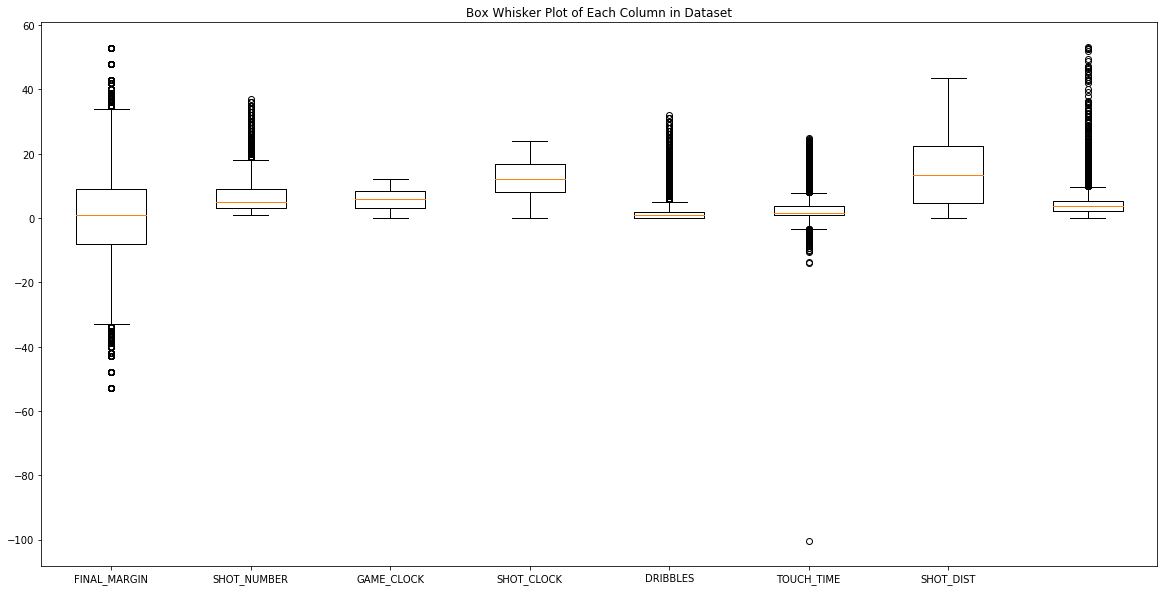

In [25]:
# Create a Box Whisker Plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([continuous[col] for col in continuous.columns])
plt.title("Box Whisker Plot of Each Column in Dataset")
plt.xticks(range(1,len(continuous.columns.values)), continuous.columns.values)
plt.show()

In [26]:
drops = features.loc[features.TOUCH_TIME<0, 'TOUCH_TIME'].index

In [27]:
features.drop(drops, inplace=True)
target.drop(drops, inplace=True)

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
features.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)

In [29]:
target = target.SHOT_RESULT.map({'missed':0, 'made':1})

In [30]:
target.value_counts(normalize=True)

0    0.543505
1    0.456495
Name: SHOT_RESULT, dtype: float64

In [31]:
top6 = ['SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME', 'GAME_CLOCK', 'SHOT_NUMBER']
features = features[top6]

## Alternate Datasets

In [31]:
#features = features[continuous.columns]
#features = features.drop(['FINAL_MARGIN'], axis=1)

### Train Test Split

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [33]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [34]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [35]:
# top4 = ['SHOT_DIST', 'CLOSE_DEF_DIST', 'SHOT_CLOCK', 'TOUCH_TIME']
# features = features[top4]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features,target, random_state=0)
#X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(less_features,target)

# XGBoost

In [36]:
pipe_xgb = Pipeline([('ss', StandardScaler()), 
                    ('clf', XGBClassifier(random_state=0))])
pipe_xgb.fit(X_train, y_train)
pipe_xgb.score(X_test, y_test)

0.6161500441884062

In [38]:
param_grid_xgb = {
    'clf__learning_rate': [.01, .1, 1],
    'clf__max_depth': [1,2,5],
    'clf__n_estimators': [5,50,100]
}

In [39]:
grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=3, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
# Best accuracy
print('Best accuracy: %.3f' % grid_xgb.best_score_)

# Best params
print('\nBest params:\n', grid_xgb.best_params_)

Best accuracy: 0.618

Best params:
 {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 50}


# Adaboost

In [40]:
pipe_ab = Pipeline([('ss', StandardScaler()), 
                    ('clf', AdaBoostClassifier(random_state=0))])
pipe_ab.fit(X_train, y_train)
pipe_ab.score(X_test, y_test)

0.6113711498805277

In [41]:
param_grid_ab = {
    'clf__learning_rate': [.001, .01, .1, 1, 10],
    'clf__n_estimators': [5,50,100]
}

In [42]:
grid_ab = GridSearchCV(pipe_ab, param_grid_ab, cv=3, scoring='accuracy')
grid_ab.fit(X_train, y_train)
# Best accuracy
print('Best accuracy: %.3f' % grid_ab.best_score_)

# Best params
print('\nBest params:\n', grid_ab.best_params_)

Best accuracy: 0.613

Best params:
 {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}


# Gradient Boost

In [36]:
pipe_gb = Pipeline([('ss', StandardScaler()), 
                    ('clf', GradientBoostingClassifier(random_state=0))])
pipe_gb.fit(X_train, y_train)
pipe_gb.score(X_test, y_test)

0.6153972046741514

In [39]:
param_grid_gb = {
    'clf__loss': ['deviance', 'exponential'],
    'clf__learning_rate': [ .01, .1, 1],
    'clf__n_estimators': [5, 50, 100],
    'clf__max_depth': [1,2,5],
    'clf__min_samples_split': [2, 5],
    #'clf__min_samples_leaf': [1, 5]
}

In [40]:
grid_gb = GridSearchCV(pipe_gb, param_grid_gb, cv=3, scoring='accuracy')
grid_gb.fit(X_train, y_train)
# Best accuracy
print('Best accuracy: %.3f' % grid_gb.best_score_)

# Best params
print('\nBest params:\n', grid_gb.best_params_)

Best accuracy: 0.618

Best params:
 {'clf__learning_rate': 0.1, 'clf__loss': 'exponential', 'clf__max_depth': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}


# Random Forest

In [37]:
pipe_rf = Pipeline([('ss', StandardScaler()), 
                    ('clf', RandomForestClassifier(random_state=0))])
pipe_rf.fit(X_train, y_train)
pipe_rf.score(X_test, y_test)

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5805374619488723

In [38]:
param_grid_rf = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 5, 10]
}

In [39]:
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)
# Best accuracy
print('Best accuracy: %.3f' % grid_rf.best_score_)

# Best params
print('\nBest params:\n', grid_rf.best_params_)

Best accuracy: 0.617

Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2}


# Bagged Trees

In [38]:
pipe_bt = Pipeline([('ss', StandardScaler()), 
                    ('clf', BaggingClassifier(DecisionTreeClassifier(criterion='gini',
                                                                         max_depth=5,
                                                                         min_samples_leaf=1,
                                                                         min_samples_split=2,
                                                                         random_state=0)))])
pipe_bt.fit(X_train, y_train)
pipe_bt.score(X_test, y_test)

0.6145134365487218

# Logit

In [39]:
pipe_lr = Pipeline([('ss', StandardScaler()), 
                    ('clf', LogisticRegression(solver='liblinear', random_state=0))])

pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_test, y_test)

0.6027298615429937

In [40]:
param_grid_lr = [
    {
        'clf__C': [.0001,.001,.01,.1, 1, 10, 100],
        #'clf__penalty': ['l1', 'l2'],
        'clf__fit_intercept': [True, False],
        'clf__solver': ['liblinear', 'lbfgs']
    }
]

In [42]:
gs_lr = GridSearchCV(pipe_lr, param_grid_lr, scoring='accuracy', cv=3)
# Fit using grid search
gs_lr.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_lr.best_score_)

# Best params
print('\nBest params:\n', gs_lr.best_params_)

Best accuracy: 0.610

Best params:
 {'clf__C': 0.0001, 'clf__fit_intercept': True, 'clf__solver': 'lbfgs'}


# K Nearest Neighbors

In [41]:
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
test_preds = clf1.predict(X_test)
print_metrics(y_test, test_preds)

Precision Score: 0.5189499844672258
Recall Score: 0.47992530345471524
Accuracy Score: 0.560243527216785
F1 Score: 0.4986753237061084


In [44]:
pipe_knn = Pipeline([
    ('ss', StandardScaler()),
    ('clf', KNeighborsClassifier())
                    ]
                   )

In [45]:
param_grid_knn = {
    'clf__n_neighbors': [1,25,50],
    'clf__p': [1,2]
}

In [46]:
knn_grid_search = GridSearchCV(pipe_knn, param_grid_knn, cv=3)
knn_grid_search.fit(X_train, y_train)
# Best accuracy
print('Best accuracy: %.3f' % knn_grid_search.best_score_)

# Best params
print('\nBest params:\n', knn_grid_search.best_params_)

Best accuracy: 0.606

Best params:
 {'clf__n_neighbors': 50, 'clf__p': 1}


# Decision Tree

In [48]:
pipe_dt = Pipeline([
    ('ss', StandardScaler()),
    ('clf', DecisionTreeClassifier())])

In [49]:
pipe_dt.fit(X_train, y_train)
y_hat = pipe_dt.predict(X_test)
print_metrics(y_test, y_hat)

Precision Score: 0.4989122043652186
Recall Score: 0.5105939811822164
Accuracy Score: 0.5432555399168604
F1 Score: 0.5046855033366463


In [50]:
param_grid_dt = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 5, 10]
}

In [51]:
dt_grid_search = GridSearchCV(pipe_dt, param_grid_dt, cv=3)
dt_grid_search.fit(X_train, y_train)
y_hat = dt_grid_search.predict(X_test)
print_metrics(y_test, y_hat)

# Best params
print('\nBest params:\n', dt_grid_search.best_params_)

Precision Score: 0.6460126219162364
Recall Score: 0.3234934999640882
Accuracy Score: 0.6109128997414159
F1 Score: 0.43110792055515673

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}


from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

clf.score(X_train, y_train)

clf.score(X_test, y_test)